# Tutorial 19: Monte Carlo Methods

## PHYS 2600

In [1]:
# Import cell
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

## T19.1 - The central limit theorem

Let's run through an example to see exactly how the central limit theorem works with random samples.  Suppose our true distribution is the uniform distribution from $(0,1)$, i.e. the default distribution for `np.random.rand()`.  The mean of this distribution is clearly $\mu = 1/2$, but we need the variance as well: it turns out to be $\sigma^2 = 1/12$.  (See the derivation below if you're curious, otherwise skip to the next cell and part A.)

---

---

We have $p(x) = 1$ for the probability density function, so

$$
\mu = \langle x \rangle = \int_0^1 dx\ x = \frac{1}{2} \\
\langle x^2 \rangle = \int_0^1 dx\ x^2 = \frac{1}{3}
$$

and thus

$$
\sigma^2 = \langle x^2 \rangle - \langle x \rangle^2 = \frac{1}{3} - \frac{1}{4} = \frac{1}{12}.
$$


### Part A

Use `np.random.rand()` to draw a sample of random numbers $\{x_i\}$ of size size $n=10,000$ from the uniform distribution over $[0,1)$.  Then compute the __sample mean__ and __sample variance__,

$$
\bar{x}_n = \frac{1}{n} \sum_{i=1}^n x_i \\
\sigma_n^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x}_n)^2 
$$

Actually, _you don't need to implement these yourself;_ use the functions `np.mean()` and `np.var()`.  (There's also a function for the standard deviation $\sigma_n$, `np.std()`, which is the square root of the variance - it's a separate function because we usually care about $\sigma_n$ more than $\sigma_n^2$.)

Your results should be pretty close to the theoretical predictions of $(\mu, \sigma^2) = (1/2, 1/12)$ - we'll worry more about _exactly_ how close they are below.

In [2]:
### BEGIN SOLUTION
sample = np.random.rand(10000)

print(np.mean(sample), np.var(sample))
print(1 / 2, 1 / 12)
### END SOLUTION

0.5070610120701831 0.08219154891530268
0.5 0.08333333333333333


Now let's be more precise: what is the __standard error of the mean__, $\sigma_{\rm{sem}} = \sigma_n / \sqrt{n}$, for your sample?  

Is your sample mean $\bar{x}_n$ within __one standard error__ of the true answer of $1/2$?  If not, is it within __three standard errors__?  What did your neighbors get?  (What do you expect, statistically?)

In [3]:
### BEGIN SOLUTION
sigma_SEM = np.std(sample) / np.sqrt(len(sample))
print(sigma_SEM)
print((np.mean(sample) - 0.5) / sigma_SEM)
### END SOLUTION

0.0028669068508638835
2.462937387747833


### Part B

Now let's study the behavior of random sampling with multiple trials.

__Complete the function `random_means(n, T)`__ that returns an array of `T` trial means $\mu_n$.  To do this, you should use a for loop that runs `T` times, each time drawing a sample of `n` random numbers from (0,1), computing the sample mean, and saving that to an array to be returned.



In [4]:
def random_means(n, T):
    """
    Return T trial sample means, drawing
    samples of size n from the uniform distribution [0,1).

    Arguments:
    ====
    n: sample size
    T: number of trials

    Returns:
    ====
    An array of length T, containing sample means for different random draws of size n.

    """

    ### BEGIN SOLUTION
    mean_array = np.zeros(T)

    for i in range(T):
        mean_array[i] = np.mean(np.random.rand(n))

    return mean_array


### END SOLUTION

In [5]:
# Simple tests - doesn't 100% guarantee your function works!

test_means = random_means(1000, 10)
print(test_means)

assert len(test_means) == 10
assert np.abs(np.mean(test_means) - 0.5) < 0.1

[0.4972723  0.50622934 0.49344908 0.50457067 0.50417615 0.5069319
 0.49207034 0.49823036 0.50179267 0.49504177]


Once your function is working, __call it with a sample size of $n=10,000$ and $T=1,000$ trials__, then __compute the variance of the array it returns__.   This is _not_ the sample variance - it is the _variance of the sample mean_, over the space of $T$ trials.  

How does this variance compare to  your result for $\sigma_{\rm SEM}^2$ from a single sample above?  How does it compare to the theoretical estimate of the sample mean variance $(1/12) / n$ from the central limit theorem?

_(Hint: of course, the $\sigma_{\rm SEM}^2$ will only agree if you used the same sample size above...make sure that's true if they disagree!)_

In [38]:
RM = random_means(10000, 1000)

## All of the three numbers below are about the same!
print(np.var(RM))
print(sigma_SEM**2)
print(1 / 12 / 10000)

8.140811064230563e-06
8.21915489153027e-06
8.333333333333332e-06


### Part C

Now let's visualize the distribution of sample means, using `random_means()`.  Using `plt.hist()`, __make a histogram__ of the array of random means that you created in the last cell.  Does it look like a normal distribution?  (It should, since both $n$ and $T$ are large enough for the central limit theorem to apply!)

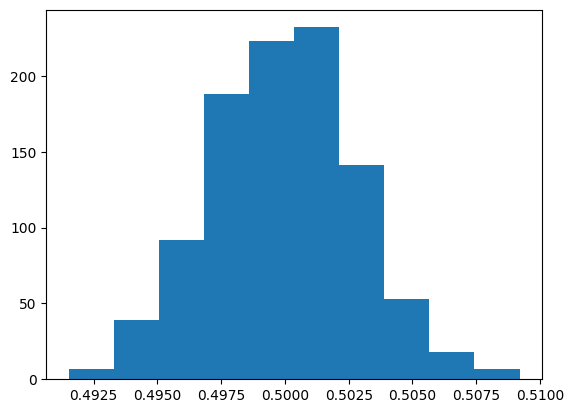

In [41]:
_ = plt.hist(RM)

Finally, __make a plot showing three histograms with `plt.hist()`__: do 1000 trials using `random_means`, but with sample sizes of 500, 2000, and 8000.  (Since the SEM decreases proportional to $\sqrt{n}$, you should see the width of the Gaussian cut in half with each increase in sample size compared to the $n=500$ case.)

(array([  2.,   9.,  79., 202., 306., 253., 115.,  29.,   4.,   1.]),
 array([0.48801707, 0.49058569, 0.4931543 , 0.49572292, 0.49829153,
        0.50086015, 0.50342876, 0.50599738, 0.50856599, 0.51113461,
        0.51370322]),
 <BarContainer object of 10 artists>)

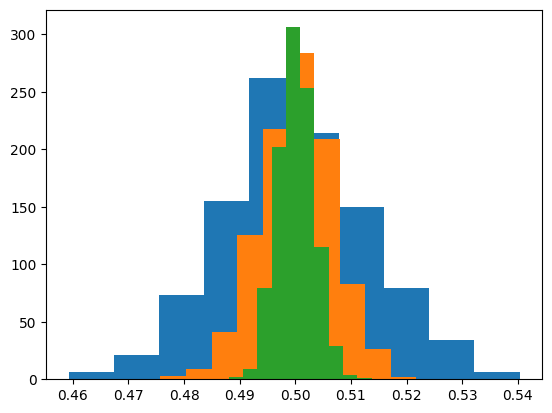

In [8]:
plt.hist(random_means(500, 1000))
plt.hist(random_means(2000, 1000))
plt.hist(random_means(8000, 1000))

## T19.2 - Let's make a deal!

One of the most (in)famous simple problems in mathematical probability is the __Monty Hall problem__ ([see here](https://en.wikipedia.org/wiki/Monty_Hall_problem) for the Wikipedia summary.)  Here is the premise: you're a contestant on a game show, where you have a chance to win a new car.  There are three doors on stage.  One of the doors has the new car behind it; the other two doors have goats.  To win the car, you just have to pick the right door.

In the simplest version of this game, it should be obvious that your odds of winning the car are $1/3$.  But let's make the game more interesting!  After you choose a door, the game show host (who knows what is behind all of the doors) opens one of the doors you _didn't_ choose, revealing a goat.  Then the host asks whether you want to keep the door which you selected initially, or switch to the other closed door.  What should you do: keep the door you chose originally, or switch to the other door?

The correct answer is summarized at the link above, if you're impatient.  But the theory behind this problem has confused lots of very intelligent people (including famous mathematician Paul Erdos) for decades - so instead of trying to figure it out, let's just use a Monte Carlo simulation to find the answer!

### Part A

To begin with, let's write a function to simulate the simplest version of the game: there are three doors with 2 goats and 1 car, and the player simply chooses one door.  The odds of picking the door with the car (and therefore winning it) are 1/3.

In order to make it easier to apply our work to the more complicated full game in the next part, we will use a __modular design__ for our simulation.  This means that we will write several functions, each of which accomplishes one small task required for the full game simulation.  (We'll be able to re-use all of the functions you write in the next part for the more complicated game.)

This also lets us use __unit tests__ - we can write individual tests for each of the short functions that you'll be implementing, instead of relying on testing the entire game at once.  Testing the whole game is important too - but unit tests make it much easier to debug small mistakes.

Your job is to __implement the functions `shuffle_prizes` and `choose_door_player`__.  Then run the third cell containing the function `play_monty_hall_simple`, a function that I have written for you which contains the rest of the pieces needed for the simple Monty Hall game.  You can read through that function to see how `shuffle_prizes` and `choose_door_player` are implemented, or rely on the docstrings I've given you.

In [54]:
def shuffle_prizes(prizes):
    """
    Given a list of prizes ('goat' or 'car'), returns a shuffled
    list with the same number of prizes but in a random order.

    Args:
      - prizes: a list consisting entirely of the strings 'goat' and 'car'.

    Returns:
      - A list with the same number of 'goat' and 'car' entries as the input
      prizes list, but in random order.
    """

    ### BEGIN SOLUTION
    return np.random.choice(prizes, len(prizes), replace=False)
    ### END SOLUTION


False

In [44]:
# Tests for shuffle_prizes
a_prize_list = ["goat", "goat", "car"]

## Shuffle until the list changes, or fail the test if it doesn't change
count = 0
shuffled = shuffle_prizes(a_prize_list)
print(shuffled)

while np.all(shuffled == a_prize_list):
    shuffled = shuffle_prizes(a_prize_list)
    print(shuffled)
    count += 1
    if count > 10:
        assert False

goat_count = sum([p == "goat" for p in shuffled])
car_count = sum([p == "car" for p in shuffled])

assert car_count == 1
assert goat_count == 2

['goat' 'car' 'goat']


In [45]:
def choose_door_player():
    """
    Simulates the initial player choice in the Monty Hall game.

    Returns:
      - A random door number from the set (0,1,2).
    """

    ### BEGIN SOLUTION
    return np.random.randint(3)
    ### END SOLUTION

In [46]:
# Tests for choose_door_player

some_doors = []
for _ in range(100):
    some_doors.append(choose_door_player())

# All doors chosen should be either 0,1,2
for door in some_doors:
    assert door in (0, 1, 2)

# All three doors should be represented within 100 choices
# (Odds of failure: (2/3)^100 ~ 10^{-18}, i.e. "never")
for door_num in (0, 1, 2):
    assert door_num in some_doors

In [47]:
def play_monty_hall_simple():
    """
    Play a single round of the simple Monty Hall game.

    Returns:
      - True if the contestant wins the car, otherwise False.
    """

    prizes = ["goat"] * 2 + ["car"] * 1

    # Randomly generate a list of three options: 'goat' twice and 'car' once
    door_prizes = shuffle_prizes(prizes)

    # To see which door the car is behind, create a mask with == 'car'
    # and then np.flatnonzero shows which mask entry is not False
    # (since False and 0 are equivalent.)
    car_door = np.flatnonzero(door_prizes == "car")
    print(f"Car is behind door: {car_door}")

    # The player randomly selects one of the doors
    player_choice = choose_door_player()
    print(f"Player chooses door: {player_choice}")

    # See if the player won or not, and return accordingly!
    if door_prizes[player_choice] == "car":
        print("Player wins!")
        return True
    else:
        print("Player loses!")
        return False

Now __run the following cell__ a few times, to simulate playing the game repeatedly.  You should see "loses" more often than "wins", but otherwise it will be hard to tell what the odds are just from this.

In [53]:
play_monty_hall_simple()

Car is behind door: [0]
Player chooses door: 1
Player loses!


False

Now let's do a real test by gathering some statistics.  __Run the next two cells below__ to play 1000 games using the function you wrote above.  If everything is set up correctly, you should see about a 33% (one in three) win rate for this simplest version of the game.  

(Note the new Jupyter magic `%%capture`, which is used to capture all `print()` output in a particular cell. This can be used to save the `print()` output to a file; in this case, we're just using it to throw out all of the descriptive text that `play_monty_hall_simple()` prints out, since seeing that 1000 times will be a lot of clutter.)

In [15]:
%%capture

win_count = 0
num_games = 1000

for _ in range(num_games):
    if play_monty_hall_simple():
        win_count += 1

In [16]:
print(
    f"Number of wins: {win_count}/{num_games} --> {100*win_count/num_games:.1f}% win rate"
)

Number of wins: 342/1000 --> 34.2% win rate


### Part B

Now let's move on to the full game!  To complete our simulation, in addition to the two functions you wrote for part A, we'll need two new functions.  __Implement `choose_door_host` and `switch_doors`__ in the two cells below.  Once again, skip ahead to read the function definition `play_monty_hall_reveal` if you want to see how these functions are used in context.

_(Hint: the `choose_door_host` function is the hard part of this problem.  It's important to make sure the host picks randomly, but also that they pick only from doors with goats and that they don't pick the same door as the player!  The simplest algorithm, although slightly wasteful, would be to just randomly pick doors with a while loop until the host chooses one that meets both conditions.)_

In [17]:
def choose_door_host(door_prizes, player_choice):
    """
    Simulates the host's door choice in the Monty Hall game.

    The host will follow these rules in picking a door to reveal:

    1) They will never reveal the door the player has already chosen;
    2) They will only reveal a door with a goat behind it.

    For the simulation to be valid, the host must choose RANDOMLY if possible!
    (If one un-revealed door is a car, then there is only one option; but
     if both are goats, they should pick at random.)

    Args:
      - door_prizes: a length-3 list which describes which prizes are behind
        which doors.  All entires in the list are the strings 'goat' or 'car'.
      - player_choice: int from (0,1,2), the door number which the player
        has already chosen

    Returns:
      - A random door number from (0,1,2), but following the rules above.
    """

    ### BEGIN SOLUTION
    other_doors = np.array([door for door in range(3) if door != player_choice])

    host_choice = np.random.choice(other_doors)

    # Now make sure the host didn't pick a car to reveal
    if door_prizes[host_choice] == "car":
        # If the random choice is a car, the other door
        # the player didn't open must be a goat
        for door in other_doors:
            if door_prizes[door] == "goat":
                host_choice = door

    return host_choice
    ### END SOLUTION

In [18]:
# Tests for choose_door_host

a_prize_list = ["car", "goat", "goat"]

# Case 1: if the player chooses a goat, the host will always pick the other goat
assert choose_door_host(a_prize_list, 1) == 2
assert choose_door_host(a_prize_list, 2) == 1

# Case 2: if the player chooses a car, the host will choose randomly from the goat doors
host_choices_test = [choose_door_host(a_prize_list, 0) for _ in range(50)]

# Make sure both goat doors are sometimes chosen
assert 1 in host_choices_test
assert 2 in host_choices_test

# Make sure no other doors are ever chosen
for door in host_choices_test:
    assert door in (1, 2)

In [19]:
def switch_doors(player_choice, host_choice):
    """
    Simulates the player's decision to switch doors in the Monty Hall game.

    The player will switch to the third door out of (0,1,2) which they
    did not choose originally and which the host did not reveal a goat behind.

    Returns:
      - The door number from (0,1,2) following the rules above.
    """

    ### BEGIN SOLUTION
    # Maybe there's a NumPy way to do this, but the sentinel pattern
    # works perfectly well here since we're looking for a specific door

    for door in range(3):
        if door != player_choice and door != host_choice:
            return door
    ### END SOLUTION

In [20]:
# Tests for switch_doors
# We can test this one by exhaustion:

# Answers below in the form (player_choice, host_choice, switched_door)
answer_key = [
    [0, 1, 2],
    [0, 2, 1],
    [1, 0, 2],
    [1, 2, 0],
    [2, 0, 1],
    [2, 1, 0],
]

for player_choice, host_choice, switch_answer in answer_key:
    switch_test = switch_doors(player_choice, host_choice)
    assert switch_test == switch_answer

In [21]:
def play_monty_hall_reveal(always_switch=False):
    """
    Play a single round of the Monty Hall game.

    Args:
      - always_switch: if True, the player always switches doors
      after the host's reveal.  Otherwise, they always keep their
      original choice.

    Returns:
      - True if the contestant wins the car, otherwise False.
    """

    prizes = ["goat"] * 2 + ["car"] * 1

    # Randomly generate a list of three options: 'goat' twice and 'car' once
    door_prizes = shuffle_prizes(prizes)

    # The player randomly selects one of the doors
    player_choice = choose_door_player()
    print(f"Player chooses door: {player_choice}")

    # The host reveals a door with a goat
    host_choice = choose_door_host(door_prizes, player_choice)
    print(f"Host reveals a goat behind door: {host_choice}!")

    # If always_switch is True, the player switches to the other un-revealed door
    if always_switch:
        player_choice = switch_doors(player_choice, host_choice)
        print(f"Player switches to door {player_choice}")

    # See if the player won or not, and return accordingly!
    if door_prizes[player_choice] == "car":
        print("Player wins!")
        return True
    else:
        print("Player loses!")
        return False

Once again, __run the cell below__ to test your code - it should run without error, and you should see all of the descriptive text printed out describing how the game is played out.

In [22]:
play_monty_hall_reveal(always_switch=True);

Player chooses door: 2
Host reveals a goat behind door: 0!
Player switches to door 1
Player wins!


After the cell above is working to your satisfaction, __run the next two cells__ to simulate 1000 games using two strategies: always switching after the reveal, or always keeping the original door.  Are you surprised by the results?  Do they match the described solution [on Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem)?

In [23]:
%%capture

win_count_switch = 0
win_count_stay = 0
num_games = 1000

for _ in range(num_games):
    if play_monty_hall_reveal(always_switch=True):
        win_count_switch += 1

for _ in range(num_games):
    if play_monty_hall_reveal(always_switch=False):
        win_count_stay += 1

In [24]:
print(
    f"Number of wins, staying: {win_count_stay}/{num_games} --> {100*win_count_stay/num_games:.1f}% win rate"
)
print(
    f"Number of wins, switching: {win_count_switch}/{num_games} --> {100*win_count_switch/num_games:.1f}% win rate"
)

Number of wins, staying: 316/1000 --> 31.6% win rate
Number of wins, switching: 704/1000 --> 70.4% win rate


### Part C (optional challenge)

The TV show _Deal or No Deal_ operates on a similar premise to the Monty Hall problem, except with more doors (briefcases of money, actually) and with one important distinction: the _player_ chooses which doors to open instead of the host.

To be concrete, here is the _Deal or No Deal_ version of our current game: after their initial choice, the player chooses one of the other doors to reveal.  If they reveal the car, then they lose - the only doors left are goats.  But if they reveal a goat, then they have the option of switching doors or keeping their original choice.

__Can you modify the algorithm from part B to simulate this version of the game?__  How does the player's win probability change?  Is switching still optimal, or not? 

(I've given you the skeleton below, as well as the set of tests to run after you implement `play_monty_hall_deal`.  The code at the beginning and end of the function is the same as `play_monty_hall_reveal`, you just have to make a couple of changes in the middle.)

In [25]:
def play_monty_hall_deal(always_switch=False):
    """
    Play a single round of the Monty Hall game.

    Args:
      - always_switch: if True, the player always switches doors
      after the host's reveal.  Otherwise, they always keep their
      original choice.

    Returns:
      - True if the contestant wins the car, otherwise False.
    """

    prizes = ["goat"] * 2 + ["car"] * 1

    # Randomly generate a list of three options: 'goat' twice and 'car' once
    door_prizes = shuffle_prizes(prizes)

    # The player randomly selects one of the doors
    player_choice = choose_door_player()
    print(f"Player chooses door: {player_choice}")

    ### BEGIN SOLUTION

    # The *player* chooses one of the other doors at random
    other_doors = np.array([door for door in range(3) if door != player_choice])
    player_second_choice = np.random.choice(other_doors)

    if door_prizes[player_second_choice] == "car":
        print("Car revealed, player loses!")
        return False

    # If always_switch is True, the player switches to the other un-revealed door
    if always_switch:
        player_choice = switch_doors(player_choice, player_second_choice)
        print(f"Player switches to door {player_choice}")

    ### END SOLUTION

    # See if the player won or not, and return accordingly!
    if door_prizes[player_choice] == "car":
        print("Player wins!")
        return True
    else:
        print("Player loses!")
        return False

In [26]:
play_monty_hall_deal(always_switch=True);

Player chooses door: 0
Player switches to door 2
Player loses!


In [27]:
%%capture

win_count_switch = 0
win_count_stay = 0
num_games = 1000

for _ in range(num_games):
    if play_monty_hall_deal(always_switch=True):
        win_count_switch += 1

for _ in range(num_games):
    if play_monty_hall_deal(always_switch=False):
        win_count_stay += 1

In [28]:
print(
    f"Number of wins, staying: {win_count_stay}/{num_games} --> {100*win_count_stay/num_games:.1f}% win rate"
)
print(
    f"Number of wins, switching: {win_count_switch}/{num_games} --> {100*win_count_switch/num_games:.1f}% win rate"
)

Number of wins, staying: 342/1000 --> 34.2% win rate
Number of wins, switching: 320/1000 --> 32.0% win rate
